## Data Description
The Data Science Job Salaries dataset contains information about salaries, roles, and employment conditions in the data science field. It has 11 columns as described below:

| Column | Description |
|--------|-------------|
| work_year | The year the salary was paid |
| experience_level | The experience level of the employee during the work year (EN = Entry, MI = Mid, SE = Senior, EX = Executive) |
| employment_type| The type of employment for the role (e.g., Full-time, Part-time, Contract, Freelance) |
| job_title | The role or job title held by the employee |
| salary | The total gross salary paid in the local currency |
| salary_currency | The currency of the salary, represented as an ISO 4217 currency code |
| salary_in_usd | The salary converted to USD for standard comparison |
| employee_residence | The primary country of residence of the employee (ISO 3166 country code) |
| remote_ratio | The percentage of work performed remotely (0 = on-site, 50 = hybrid, 100 = fully remote) |
| company_location | The country where the employer’s main office or contracting branch is located |
| company_size | The median size of the company during the work year, categorized as S (small), M (medium), or L (large) |

Notes:
- Salaries are reported in local currencies and standardized to USD for analysis.

- The dataset includes a mix of remote and on-site roles, allowing comparison of compensation by work style.

- It covers multiple years, enabling time-based analysis of salary trends.

## Objective of analysis
The objective of this analysis is to **explore the distribution of data science salaries** and **understand how compensation varies across experience levels, job roles, and time**. Using distribution-based visualizations—including histogram, KDE, ECDF, and boxplot—the analysis aims to uncover salary inequality, career progression patterns, temporal salary growth, and role-based differences to provide insights for aspiring data professionals when making career decisions.

## Data Overview
### First 5 Rows
The `.head()` method allows us to preview the **first five rows** of the dataset and see the column names.

In [2]:
import pandas as pd

salaries = pd.read_csv('/Users/chowjiahui/Documents/GWU/Data Visualisation/Homework/ds_salaries.csv')

salaries.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

### Dataset Structure

The `.info()` method provides a concise summary of the dataset, including the **data type of each column** and **non-null counts**, helping us identify missing values and data types.  
The `.shape` attribute shows the **number of rows and columns** in the dataset.

In [3]:
salaries.info()
salaries.shape

<class 'pandas.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   str  
 2   employment_type     3755 non-null   str  
 3   job_title           3755 non-null   str  
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   str  
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   str  
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   str  
 10  company_size        3755 non-null   str  
dtypes: int64(4), str(7)
memory usage: 322.8 KB


(3755, 11)

### Summary Statistics

The `.describe()` method provides **summary statistics** for each column, including measures like **count, mean, standard deviation, min, max**, and percentiles for numeric columns.  

In [4]:
salaries.describe(include='all')

work_year experience_level employment_type      job_title  \
count   3755.000000             3755            3755           3755   
unique          NaN                4               4             93   
top             NaN               SE              FT  Data Engineer   
freq            NaN             2516            3718           1040   
mean    2022.373635              NaN             NaN            NaN   
std        0.691448              NaN             NaN            NaN   
min     2020.000000              NaN             NaN            NaN   
25%     2022.000000              NaN             NaN            NaN   
50%     2022.000000              NaN             NaN            NaN   
75%     2023.000000              NaN             NaN            NaN   
max     2023.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   3.755000e+03            3755    3755.000000               3755   
unique           NaN              20            NaN                 78   
top              NaN             USD            NaN                 US   
freq             NaN            3224            NaN               3004   
mean    1.906956e+05             NaN  137570.389880                NaN   
std     6.716765e+05             NaN   63055.625278                NaN   
min     6.000000e+03             NaN    5132.000000                NaN   
25%     1.000000e+05             NaN   95000.000000                NaN   
50%     1.380000e+05             NaN  135000.000000                NaN   
75%     1.800000e+05             NaN  175000.000000                NaN   
max     3.040000e+07             NaN  450000.000000                NaN   

        remote_ratio company_location company_size  
count    3755.000000             3755         3755  
unique           NaN               72            3  
top              NaN               US            M  
freq             NaN             3040         3153  
mean       46.271638              NaN          NaN  
std        48.589050              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

### Top 10 Most Common Job Titles

`salaries['job_title'].value_counts().head(10)` returns the **10 most frequently occurring job titles** in the dataset, **ranked from highest to lowest count**. This helps identify which roles are most represented in the data and ensures that further analysis, such as comparing salaries by job title, focuses on positions with sufficient sample size.

In [5]:
salaries['job_title'].value_counts().head(10)

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: count, dtype: int64

## Exploratory Data Analysis
### Data Cleaning
The column `salary_in_usd` was selected and converted to numeric format, with invalid values coerced to NaN and removed. 

Basic checks were performed to confirm data quality, including the number of valid records, minimum and maximum salaries, and the mean and standard deviation.

In [6]:
s = pd.to_numeric(salaries['salary_in_usd'], errors="coerce").dropna()
print(f"Series length after dropping NaNs: {len(s)}")

# Basic sanity checks
print("Min/Max:", float(s.min()), float(s.max()))
print("Mean/Std:", float(s.mean()), float(s.std(ddof=1)))

Series length after dropping NaNs: 3755
Min/Max: 5132.0 450000.0
Mean/Std: 137570.38988015978 63055.6252782241


### Histogram Binning Method

The Freedman–Diaconis (FD) rule was used to determine the bin width for the salary histogram. This method adapts the number of bins based on the data’s spread and sample size, making it more robust to skewness and outliers than fixed-width binning.

Using both NumPy’s implementation and a manual calculation for validation, the FD rule resulted in approximately 44-45 bins, with a computed bin width of about 10294 USD.

In [7]:
import numpy as np

# Freedman–Diaconis bin edges via NumPy
edges_fd = np.histogram_bin_edges(s, bins='fd')
print("FD edges count:", len(edges_fd))

# Also compute the FD bin count via the formula for illustration
q75, q25 = np.percentile(s, [75, 25])
iqr = q75 - q25
n = s.size
h = 2 * iqr * (n ** (-1/3)) if iqr > 0 else None
if h is not None and h > 0:
    approx_bins = int(np.ceil((s.max() - s.min()) / h))
    print("FD approx. bin count (manual):", approx_bins, "| h =", h)
else:
    print("IQR=0 (or too small); FD rule degenerates. Falling back to 20 bins.")
    edges_fd = np.histogram_bin_edges(s, bins=20)

FD edges count: 45
FD approx. bin count (manual): 44 | h = 10293.980365282785


### Histogram Bin Validation

After computing the Freedman–Diaconis bin edges, the histogram counts were generated using NumPy’s histogram function. Inspecting the resulting bin counts and edges confirmed that observations were distributed sensibly across bins, with no empty or excessively dense intervals dominating the distribution.

This validation step ensures that the histogram accurately represents the underlying salary data and that the chosen binning strategy produces a stable and interpretable visualization.

In [8]:
counts_fd, edges_fd_used = np.histogram(s, bins=edges_fd)
print("Counts (first 10):", counts_fd[:10])
print("Edges (first 10): ", edges_fd_used[:10])

Counts (first 10): [ 50  54  39  75 135 137 151 167 154 229]
Edges (first 10):  [ 5132.         15242.63636364 25353.27272727 35463.90909091
 45574.54545455 55685.18181818 65795.81818182 75906.45454545
 86017.09090909 96127.72727273]


### Histogram: Distribution of Salaries

We use a histogram to examine the distribution of salaries across the years. This helps us understand the spread of salaries and identify the typical pay range for data science professionals.

#### Interpretation of Histogram
- **Shape and Skew:**
  The salary distribution is unimodal and strongly right-skewed, with most salaries concentrated between roughly USD 60k–200k and a
  peak around the mid range. The long tail extending beyond USD 300k indicates that a small group of professionals earn exceptionally
  high pay, causing the mean to be higher than the median.
- **Skew:**
  The spread is wide, showing substantial variability in data science compensation across roles and regions.
- **Outliers:**
  A few extreme values on the far right act as potential outliers, likely representing senior or highly specialized positions.

Overall, the histogram suggests that while typical salaries are moderate, the market rewards top-tier expertise disproportionately.


#### Pros and Cons of Histogram
- **Pros:**
  * Simple and intuitive for showing overall shape and frequency.
  * Good for identifying skewness and visible outliers.
  * Freedman–Diaconis binning adapts to data variability.

- **Cons:**
  * Appearance depends on bin width choice.
  * Does not easily allow comparison between groups (e.g., experience levels).

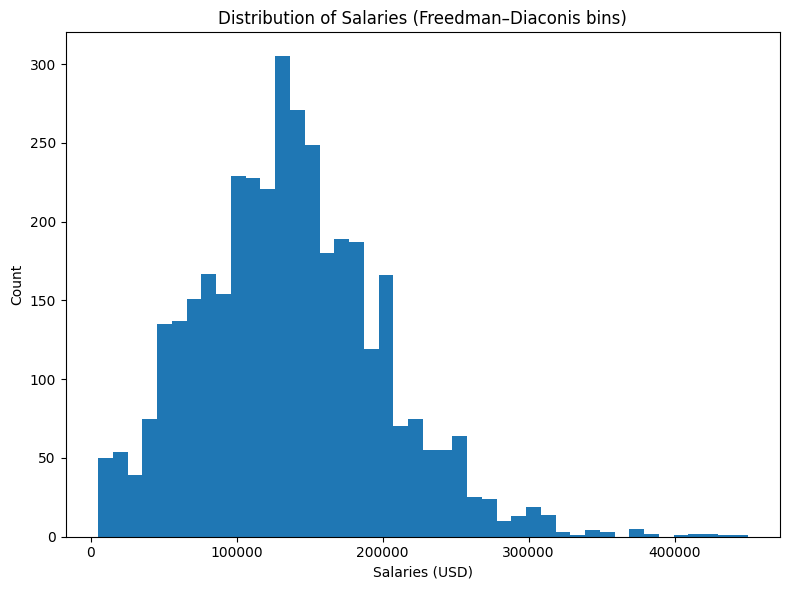

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(s, bins=edges_fd_used) 
plt.xlabel("Salaries (USD)")
plt.ylabel("Count")
plt.title("Distribution of Salaries (Freedman–Diaconis bins)")
plt.tight_layout()
plt.show()

### KDE: Salary Distribution by Experience Level
We use a KDE plot to compare the salary distributions across different experience levels and to observe how earning potential changes with career progression. 

#### Interpretation of KDE

- **Shape:** The plot shows a clear rightward shift in the distributions from Entry (EN) to Senior (SE) and Executive (EX) levels, indicating that more experienced professionals generally earn higher salaries.
- **Spread:** Entry and Mid levels peak at lower salary ranges, while Senior roles display a higher peak and a noticeably wider spread.
- **Skewness:** All experience groups exhibit right-skew, meaning a small proportion of individuals receive exceptionally high pay.
- **Outliers:** The Executive curve appears flatter due to fewer observations but extends furthest to the right, suggesting the greatest earning potential. 

Overall, the plot highlights that experience strongly influences both the level and variability of data science salaries.

#### Pros and Cons of KDE

- **Pros:**
  * Smooth comparison of multiple groups on one chart.
  * Reveals overall distribution shape and overlap between experience levels.
  * Not dependent on bin choices like histograms.

- **Cons:**
  * Does not show actual counts or sample sizes.
  * Can oversmooth and suggest patterns that are not truly present.
  * Sensitive to bandwidth selection, especially for small groups (e.g., EX).

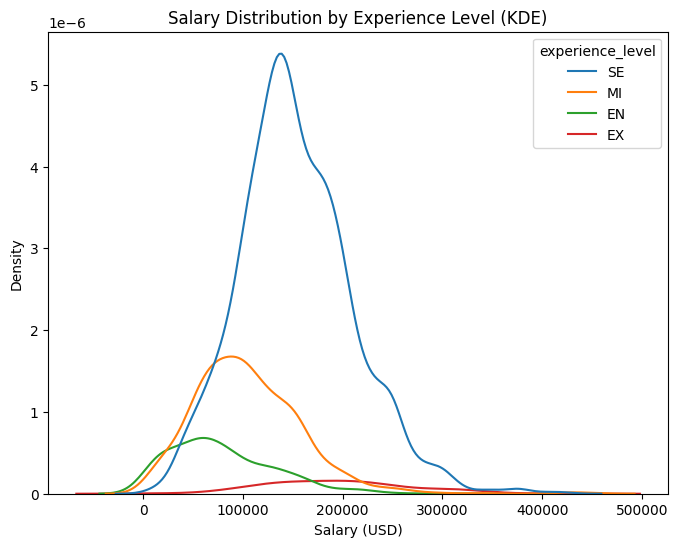

In [10]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.kdeplot(data=salaries, x="salary_in_usd", hue="experience_level")
plt.title("Salary Distribution by Experience Level (KDE)")
plt.xlabel("Salary (USD)")
plt.ylabel("Density")
plt.show()

### ECDF: Salaries by Work Year
We use an ECDF plot to compare salary distributions across different work years and to examine how compensation has evolved over time.

#### Intepretation of ECDF
- **Shape:** The curves for later years, particularly 2022 and 2023, shift noticeably to the right, indicating that a larger proportion of employees are earning higher salaries than in earlier years. 
- **Skewness:** All distributions remain right-skewed, as most employees earn below the upper salary range while only a small group receives very high pay. 
- **Spread:** The increasing horizontal spread of the recent curves suggests that salary variability has grown over time, reflecting a widening gap between typical and top earners. 
- **Outliers:** The long upper tails further highlight the presence of high-earning outliers in the data.
  

#### Pros and Cons of ECDF

- **Pros:**
  * Shows the exact proportion earning below any salary threshold.
  * Excellent for comparing distributions across years without binning.
  * Not affected by histogram bin choices or KDE smoothing.

- **Cons:**
  * Does not directly show density peaks or modes.
  * Harder for non-technical audiences to interpret.
  * Differences between groups can be subtle when curves overlap.

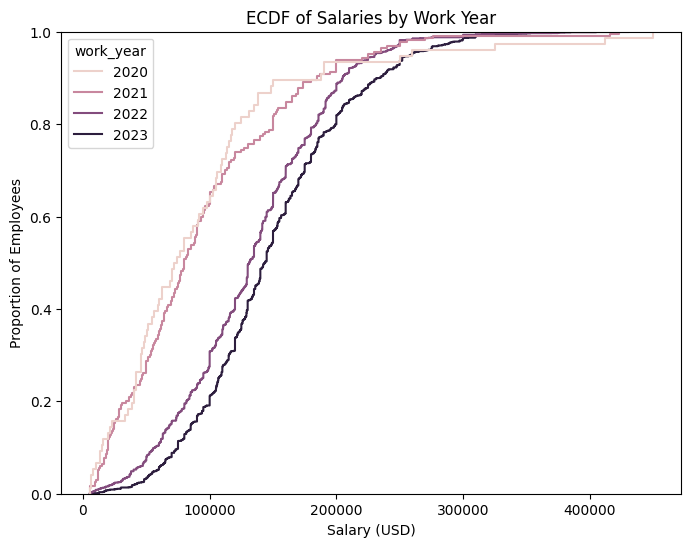

In [11]:
plt.figure(figsize=(8,6))
sns.ecdfplot(data=salaries, x="salary_in_usd", hue="work_year")
plt.title("ECDF of Salaries by Work Year")
plt.xlabel("Salary (USD)")
plt.ylabel("Proportion of Employees")
plt.show()

### Selecting the Top 10 Job Titles
This code identifies the 10 most common job titles in the dataset and filters the data to keep only records belonging to those roles. This helps focus the analysis on the most representative and frequently occurring positions.

In [12]:
top_jobs = salaries["job_title"].value_counts().head(10).index
salaries_top = salaries[salaries["job_title"].isin(top_jobs)]

### Boxplot: Salary Distribution for Top 10 Data Job Roles
We use a boxplot to compare salary distributions across the top job roles and to examine how compensation differs by specialization.

#### Interpretation of Boxplot
- **Shape:** The plot shows clear variation in median salaries, with roles such as Data Science Manager, Machine Learning Engineer, and Applied Scientist generally positioned higher than Data Analyst. 
- **Spread:** The spread of salaries also differs noticeably between roles; technical and managerial positions display wider interquartile ranges, suggesting greater variability and negotiation potential, while analyst roles are more concentrated.
- **Skewness:** Many job titles exhibit right-skew, where the upper whiskers extend further than the lower ones, indicating that a portion of professionals earn well above the typical range.
- **Outliers:** Several outliers appear beyond the whiskers, reflecting exceptionally high salaries likely linked to seniority, location, or niche expertise.

#### Pros and Cons of Boxplot

- **Pros:**
  * Clear comparison of medians and variability across multiple roles.
  * Explicit identification of outliers.
  * Compact and easy to interpret for categorical groups.

- **Cons:**
  * Does not show the full distribution shape.
  * Sample size differences between roles are not visible.
  * Can oversimplify complex salary patterns.

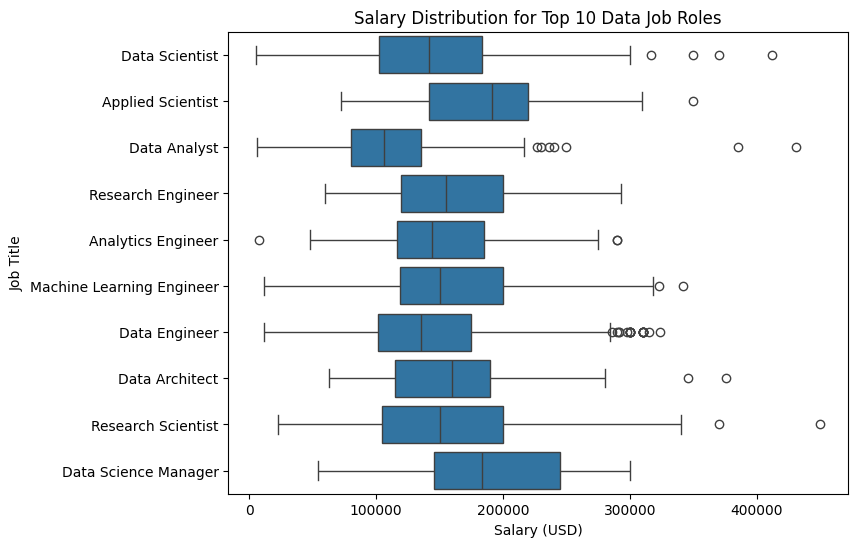

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=salaries_top, x="salary_in_usd", y="job_title")
plt.title("Salary Distribution for Top 10 Data Job Roles")
plt.xlabel("Salary (USD)")
plt.ylabel("Job Title")
plt.show()

## Conclusion

This analysis of the Data Science Job Salaries dataset highlights that compensation in the data field is highly varied and influenced by multiple factors. The histogram revealed an overall right-skewed salary distribution, where most professionals earn moderate pay while a small group receives exceptionally high salaries. The KDE plot further showed that experience level strongly shapes earnings, with distributions shifting upward and becoming more dispersed from entry to senior and executive roles.

The ECDF analysis demonstrated that salaries have increased over recent years, as later work years consistently shifted to higher ranges, reflecting growing demand for data skills. Finally, the boxplot comparison across job titles confirmed that specialization matters—technical and managerial roles tend to offer higher and more variable pay than analyst positions.

Overall, the findings suggest that career progression, job role, and market growth all play key roles in determining salary outcomes in data science.